In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

file_dir = os.path.abspath('')

In [2]:
filenames = { "Full year actual" : "/sam_results/8760_actual_data.xlsx",
"Full year forecast" : "/sam_results/8760_forecast_data.xlsx",
"Peak shaving actual" : "/sam_results/actual_peak_shaving.xlsx",
"Price signals actual" : "/sam_results/actual_price_signals.xlsx",
"Peak shaving forecast" : "/sam_results/forecast_peak_shaving.xlsx",
"Price signals forecast" : "/sam_results/forecast_price_signals.xlsx",
"Manual dispatch" :"/sam_results/manual_dispatch.xlsx",
"MPC actual" : "/sam_results/mpc_actual_data.xlsx",
"MPC forecast" : "/sam_results/mpc_forecast_data.xlsx" }

data = {}
for k, v in filenames.items():
    df = pd.read_excel(file_dir + v, sheet_name="Lifetime Hourly Data")
    data[k] = df

In [5]:
to_from_batt = {}
for k, v in data.items():
    dispatch = v["Electricity to/from battery AC | (kW)"].values
    to_from_batt[k] = dispatch

In [4]:
# Quantify power error
forecast_path = file_dir + "\\pv_production_forecast.csv"
actual_data = file_dir + "\\pv_production_actual.csv"

forecast_pv_df = pd.read_csv(forecast_path)
actual_pv_df = pd.read_csv(actual_data)

forecast_path = file_dir + "\\weather_and_load\\san_juan_hospital_forecast_load.csv"
actual_data = file_dir + "\\weather_and_load\\san_juan_hospital_actual_load.csv"

forecast_load_df = pd.read_csv(forecast_path)
actual_load_df = pd.read_csv(actual_data)

range(0, 24, 3)


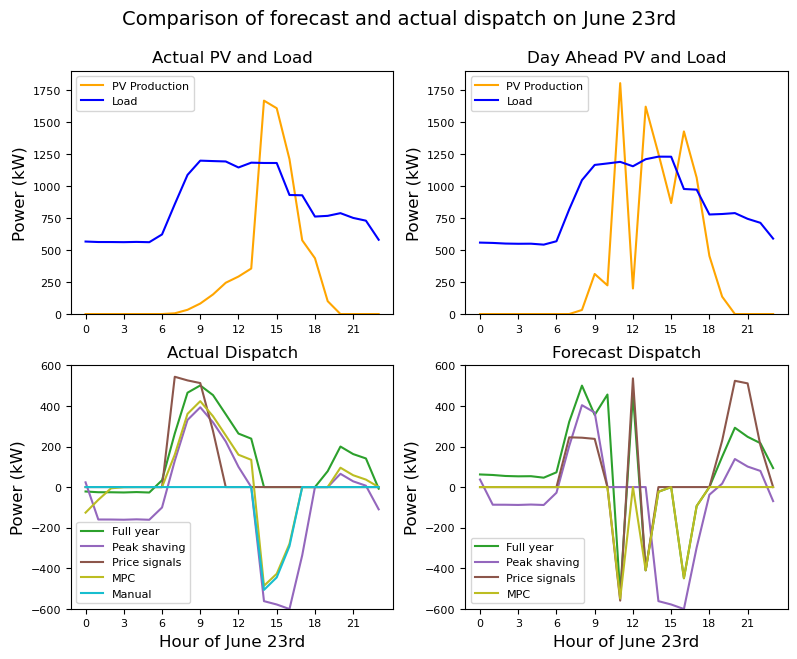

In [48]:
# Same as above, but bigger for the poster

start_time = 4151
end_time = start_time + 24
time = range(0, 24)


SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
        
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig = plt.figure(figsize=(8, 12))

x_tics = time[0:25:3]
print(x_tics)
x_labels = ["0", "3", "6", "9", "12", "15", "18", "21"]

ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(423)
ax3 = fig.add_subplot(422)
ax4 = fig.add_subplot(424)
ax1.set_title('Actual PV and Load')
ax1.set_ylabel('Power (kW)')
ax2.set_title('Actual Dispatch')
ax2.set_ylabel('Power (kW)')
ax3.set_title('Day Ahead PV and Load')
ax3.set_ylabel('Power (kW)')
ax2.set_xlabel('Hour of June 23rd')
ax4.set_title('Forecast Dispatch')
ax4.set_ylabel('Power (kW)')
ax4.set_xlabel('Hour of June 23rd')
fig.suptitle('Comparison of forecast and actual dispatch on June 23rd', y=1)
a1 = ax1.plot(time, actual_pv_df.Power.values[start_time:end_time], label="PV Production", color="orange")
a2 = ax1.plot(time, actual_load_df.Load.values[start_time:end_time], label="Load", color="blue")
label = True


ax1.set_xticks(x_tics)
ax1.set_xticklabels(x_labels)

handles, labels = ax1.get_legend_handles_labels()
labels = [l.get_label() for l in handles]
ax1.legend(handles, labels, loc='upper left') # bbox_to_anchor=(0.03, 0.4)

# Forecast PV and load
a1 = ax3.plot(time, forecast_pv_df.Power.values[start_time:end_time], label="PV Production", color="orange")
a2 = ax3.plot(time, forecast_load_df.Load.values[start_time:end_time], label="Load", color="blue")
label = True


ax2.set_xticks(x_tics)
ax2.set_xticklabels(x_labels)
ax3.set_xticks(x_tics)
ax3.set_xticklabels(x_labels)
ax4.set_xticks(x_tics)
ax4.set_xticklabels(x_labels)

handles, labels = ax3.get_legend_handles_labels()
labels = [l.get_label() for l in handles]
ax3.legend(handles, labels, loc='upper left')

dummy = ax2.plot(time, to_from_batt["Full year actual"][start_time:end_time], label="Full year", color="tab:green")
dummy = ax2.plot(time, to_from_batt["Peak shaving actual"][start_time:end_time], label="Peak shaving", color="tab:purple")
dummy = ax2.plot(time, to_from_batt["Price signals actual"][start_time:end_time], label="Price signals", color="tab:brown")
dummy = ax2.plot(time, to_from_batt["MPC actual"][start_time:end_time], label="MPC", color="tab:olive")
dummy = ax2.plot(time, to_from_batt["Manual dispatch"][start_time:end_time], label="Manual", color="tab:cyan")
label = True


handles, labels = ax2.get_legend_handles_labels()
labels = [l.get_label() for l in handles]
ax2.legend(handles, labels, loc='lower left')

dummy = ax4.plot(time, to_from_batt["Full year forecast"][start_time:end_time], label="Full year", color="tab:green")
dummy = ax4.plot(time, to_from_batt["Peak shaving forecast"][start_time:end_time], label="Peak shaving", color="tab:purple")
dummy = ax4.plot(time, to_from_batt["Price signals forecast"][start_time:end_time], label="Price signals", color="tab:brown")
dummy = ax4.plot(time, to_from_batt["MPC forecast"][start_time:end_time], label="MPC", color="tab:olive")
label = True

handles, labels = ax4.get_legend_handles_labels()
labels = [l.get_label() for l in handles]
ax4.legend(handles, labels, loc='lower left')

ax1.set_ylim(0, 1900)
ax3.set_ylim(0, 1900)

ax2.set_ylim(-600, 600)
ax4.set_ylim(-600, 600)

fig.tight_layout(pad=1.0)
fig.savefig("dispatch_comparison.png",bbox_inches='tight')